# Decision Tree for Record Data
This page contains the Decision Trees code and visualizations done in Python for Record data.


## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from numpy import transpose


## Inputting Data File

This data is Web-Scrapped from Macy's Official Website and consists of the New Arrivals of Apparel for Women and Men. 

In [2]:
df = pd.read_csv('macy_mw.csv')
df.head()

,Brand,Category,Color0,Color1,Color2,Color3,Color4,Color5,Rating,URL,Average_Price,C0_stock,C1_stock,C2_stock,C3_stock,C4_stock,C5_stock,Total_stock,Gender,Price_type
0,Camper,Shoes,Multicolor,NaN,NaN,NaN,NaN,NaN,5.0000,https://www.macys.com/shop/product/camper-mens...,NaN,15,0,0,0,0,0,15,Men,NaN
1,Timberland,Shoes,Black,Dark Brown,NaN,NaN,NaN,NaN,4.5767,https://www.macys.com/shop/product/timberland-...,89.95,66,66,0,0,0,0,132,Men,Reasonable
2,Weatherproof Vintage,Men,Black,Rosin,Navy,Port,Pumpkin,NaN,0.0000,https://www.macys.com/shop/product/weatherproo...,49.00,10,10,10,10,10,0,50,Men,Reasonable
3,Michael Kors,Casual Button-Down Shirts,Black,White,Dark Blue,Alloy Gray,NaN,NaN,4.5116,https://www.macys.com/shop/product/michael-kor...,62.65,10,10,10,10,0,0,40,Men,Reasonable
4,Tommy Hilfiger,Blazers & Sport Coats,Brown,NaN,NaN,NaN,NaN,NaN,0.0000,https://www.macys.com/shop/product/tommy-hilfi...,139.99,91,0,0,0,0,0,91,Men,Expensive


## Cleaning and formatting the dataset to the required format
There are a lot of unwated columns in the dataframe. These columns are dropped from the dataframe, retaining only the necessary columns. The stopwords are removed and the text is tokenized, lemmatized and stemmed. Countvectorizer is applied on the data to convert it to numerical format. Checking the balance of the label is very important before performing decision trees, as unbalanced dataset may lead to over or underfitting.

In [3]:
# Remove NA values
df = df.dropna()
df.head()

,Brand,Category,Color0,Color1,Color2,Color3,Color4,Color5,Rating,URL,Average_Price,C0_stock,C1_stock,C2_stock,C3_stock,C4_stock,C5_stock,Total_stock,Gender,Price_type
6,Lauren Ralph Lauren,Blazers & Sport Coats,Black/grey,Light Blue,Navy,Forest Green,Wine/black,Oatmeal,0.0000,https://www.macys.com/shop/product/lauren-ralp...,139.99,136,129,190,138,190,155,938,Men,Expensive
16,Haggar,Pants,Black,Sand,Med Khaki,Dark Grey,Dark Navy,Heather Grey,4.4198,https://www.macys.com/shop/product/haggar-mens...,45.49,300,286,300,190,293,225,1594,Men,Reasonable
19,Calvin Klein,Coats & Jackets,Black,New Navy,Iron,Deep Red,Lt Grey Heather,White,4.6235,https://www.macys.com/shop/product/calvin-klei...,55.99,21,21,21,21,21,21,141,Men,Reasonable
24,Van Heusen,Suits & Tuxedos,Black,Dark Navy,Black Herringbone,Bright Navy Blue Solid,Black / White Tic,Medium Grey Sharkskin,3.9733,https://www.macys.com/shop/product/van-heusen-...,99.99,133,130,136,109,136,136,1048,Men,Reasonable
25,Nautica,Suits & Tuxedos,Blue Solid,Charcoal solid,Navy Plaid,Blue plaid,Light grey solid,Navy birdseye,3.5938,https://www.macys.com/shop/product/nautica-men...,99.99,3,28,48,4,47,17,147,Men,Reasonable


In [4]:
# Keep only the columns we need
df = df[['Rating', 'Average_Price', 'C0_stock', 'C1_stock','C2_stock','C3_stock','C4_stock','C5_stock','Total_stock','Gender']]
df.head()

,Rating,Average_Price,C0_stock,C1_stock,C2_stock,C3_stock,C4_stock,C5_stock,Total_stock,Gender
6,0.0000,139.99,136,129,190,138,190,155,938,Men
16,4.4198,45.49,300,286,300,190,293,225,1594,Men
19,4.6235,55.99,21,21,21,21,21,21,141,Men
24,3.9733,99.99,133,130,136,109,136,136,1048,Men
25,3.5938,99.99,3,28,48,4,47,17,147,Men


In [5]:
# Replace the values in the 'Gender' column with 0 and 1
df['Gender'] = df['Gender'].replace(['Women', 'Men'], [0, 1])
df.head()

,Rating,Average_Price,C0_stock,C1_stock,C2_stock,C3_stock,C4_stock,C5_stock,Total_stock,Gender
6,0.0000,139.99,136,129,190,138,190,155,938,1
16,4.4198,45.49,300,286,300,190,293,225,1594,1
19,4.6235,55.99,21,21,21,21,21,21,141,1
24,3.9733,99.99,133,130,136,109,136,136,1048,1
25,3.5938,99.99,3,28,48,4,47,17,147,1


In [6]:
# INSERT CODE TO MAKE DATA-FRAMES (or numpy arrays) (X,Y) WHERE Y="target" COLUMN and X="everything else"
X=df.drop(columns=['Gender'])
Y=df['Gender']

## Model Building

Before building the model, the dataset is split into training and testing sets. The split ratio is 0.75 of the total data in the training set and 0.25 data in the testing set. Three different decision trees are created. The Decision Trees differ due to hypertuning of different parameters. Mainly criterion (entropy, gini), splitter (best, random) ,max_depth is tuned.

In [7]:
# INSERT CODE TO PARTITION THE DATASET INTO TRAINING AND TEST SETS

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=333)


In [8]:
# INSERT CODE, AS A CONSISTENCY CHECK, TO PRINT THE TYPE AND SHAPE OF x_train, x_test, y_train, y_test

print('Type of x_train:', type(X_train))
print('Shape of x_train:', X_train.shape)
print('Type of x_test:', type(X_test))
print('Shape of x_test:', X_test.shape)
print('Type of y_train:', type(y_train))
print('Shape of y_train:', y_train.shape)
print('Type of y_test:', type(y_test))
print('Shape of y_test:', y_test.shape)


Type of x_train: <class 'pandas.core.frame.DataFrame'>
Shape of x_train: (60, 9)
Type of x_test: <class 'pandas.core.frame.DataFrame'>
Shape of x_test: (21, 9)
Type of y_train: <class 'pandas.core.series.Series'>
Shape of y_train: (60,)
Type of y_test: <class 'pandas.core.series.Series'>
Shape of y_test: (21,)


## What are Decision Trees

`Introduction:`

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.As you can see from the diagram above, a decision tree starts with a root node, which does not have any incoming branches. The outgoing branches from the root node then feed into the internal nodes, also known as decision nodes. Based on the available features, both node types conduct evaluations to form homogenous subsets, which are denoted by leaf nodes, or terminal nodes. The leaf nodes represent all the possible outcomes within the dataset. As an example, let’s imagine that you were trying to assess whether or not you should go surf. 

`Decision Tree Representation: `

Decision trees classify instances by sorting them down the tree from the root to some leaf node, which provides the classification of the instance. An instance is classified by starting at the root node of the tree, testing the attribute specified by this node, then moving down the tree branch corresponding to the value of the attribute as shown in the above figure. This process is then repeated for the subtree rooted at the new node. 
The decision tree in above figure classifies a particular morning according to whether it is suitable for playing tennis and returns the classification associated with the particular leaf.

`Gini Index:`

Gini Index is a score that evaluates how accurate a split is among the classified groups. Gini index evaluates a score in the range between 0 and 1, where 0 is when all observations belong to one class, and 1 is a random distribution of the elements within classes. In this case, we want to have a Gini index score as low as possible. Gini Index is the evaluation metrics we shall use to evaluate our Decision Tree Model.

In [9]:
#### INSERT CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
# INSERT CODE TO USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(X_train)
yp_test = model.predict(X_test)

In [11]:
#INSERT CODE TO WRITE A FUNCTION def confusion_plot(y_data,y_pred) WHICH GENERATES A CONFUSION MATRIX PLOT AND PRINTS THE INFORMATION ABOVE (see link above for example)

def confusion_plot(y_data, y_pred):
    
    cm = confusion_matrix(y_data, y_pred)
    print('ACCURACY: {:.2f}'.format(accuracy_score(y_data, y_pred)))
    print('NEGATIVE RECALL (Y=0): {:.2f}'.format(recall_score(y_data, y_pred, pos_label=0)))
    print('NEGATIVE PRECISION (Y=0): {:.2f}'.format(precision_score(y_data, y_pred, pos_label=0)))
    print('POSITIVE RECALL (Y=1): {:.2f}'.format(recall_score(y_data, y_pred, pos_label=0)))
    print('POSITIVE PRECISION (Y=1): {:.2f}'.format(precision_score(y_data, y_pred, pos_label=1)))
    print(cm)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()
    

------TRAINING------
ACCURACY: 1.00
NEGATIVE RECALL (Y=0): 1.00
NEGATIVE PRECISION (Y=0): 1.00
POSITIVE RECALL (Y=1): 1.00
POSITIVE PRECISION (Y=1): 1.00
[[22  0]
 [ 0 38]]


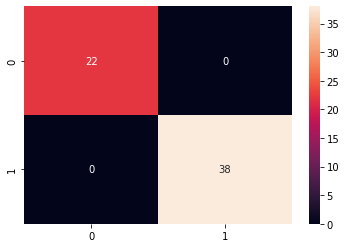

------TEST------
ACCURACY: 0.81
NEGATIVE RECALL (Y=0): 0.80
NEGATIVE PRECISION (Y=0): 0.57
POSITIVE RECALL (Y=1): 0.80
POSITIVE PRECISION (Y=1): 0.93
[[ 4  1]
 [ 3 13]]


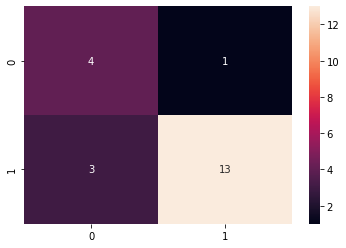

In [12]:
# RUN THE FOLLOWING CODE TO TEST YOUR FUNCTION 
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)


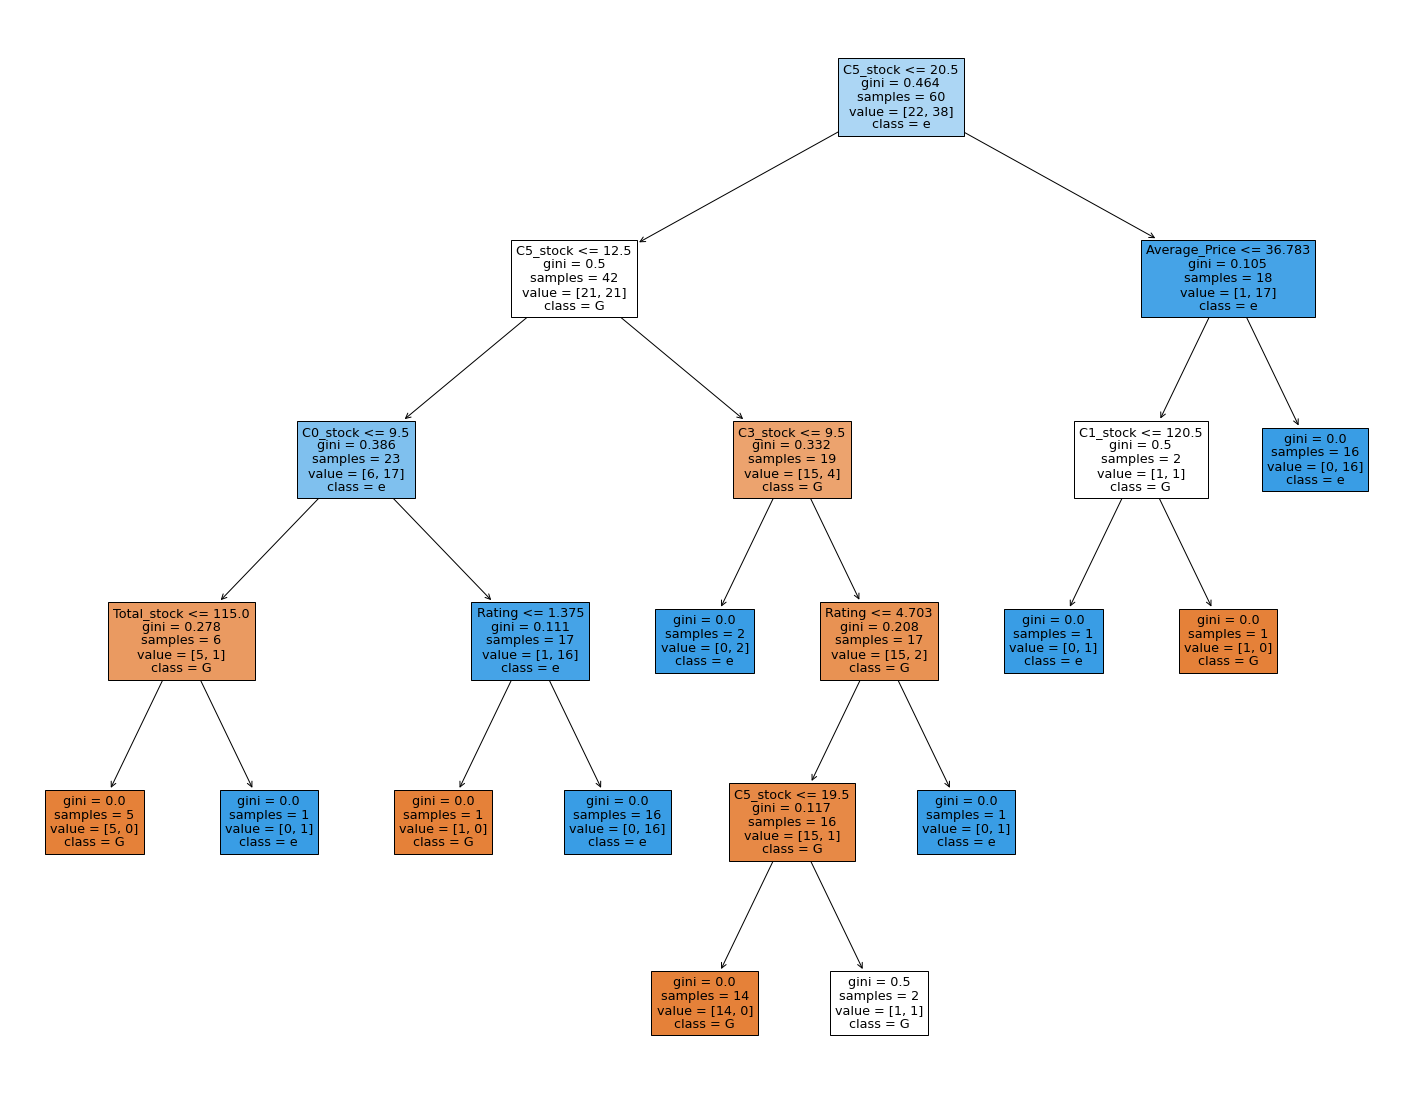

In [18]:
# DECISION TREE VISUALIZATION
def plot_tree(model,X,Y):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import graphviz
    from sklearn import tree
    from IPython.display import Image
    import pydotplus
    dot_data = tree.export_text(model)
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(model,feature_names=X.columns,class_names=Y.name,filled=True)
    plt.show()


plot_tree(model,X_train,y_train)

# Hyperparameter Tuning

Since the accuracy scores of the Decision tree models with random hyperparameters were not up to the mark we have to tune our hyperparameters accordingly.

From above random models, it is concluded that even if Entropy performs better feature selection, the difference is less when we compare to Gini Impurity. This is not the case for computational time, which is higher when we take Entropy as our criterion.

It is also observed that increasing the depth of the decision tree leads to better results but it also increases the complexity of the model and thus may lead to overfitting. Hence we need to find an optimal depth for our decision tree model.

This can be achieved by iterating with the help of loops over depth ranging from 0-20 and finding the accuracy and recall for all the depths.

In [14]:
# COMPLETE THE FOLLOWING CODE TO LOOP OVER POSSIBLE HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(X_train, y_train)

    yp_train=model.predict(X_train)
    yp_test=model.predict(X_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label=0),recall_score(y_test, yp_test,pos_label=1)])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label=0),recall_score(y_train, yp_train,pos_label=1)])


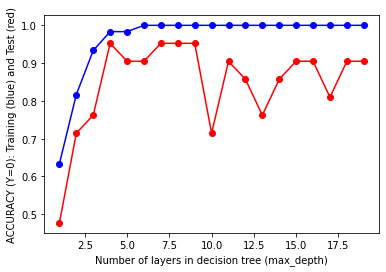

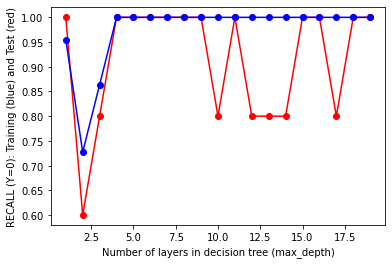

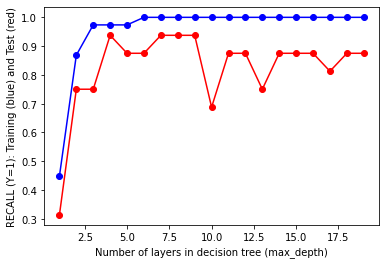

In [15]:
# INSERT CODE TO GENERATE THE THREE PLOTS BELOW (SEE EXPECTED OUTPUT FOR EXAMPLE)
# NOTE: THERE IS A TYPO IN THE THIRD PLOT, IT SHOULD BE RECALL IN THE Y-AXIS LABEL NOT ACCURACY

plt.plot([x[0] for x in test_results],[x[1] for x in test_results],label='test', color='red', marker='o')
plt.plot([x[0] for x in train_results],[x[1] for x in train_results],label='train', color='blue', marker='o')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('ACCURACY (Y=0): Training (blue) and Test (red)')
plt.show()

plt.plot([x[0] for x in test_results],[x[2] for x in test_results],label='test', color='red', marker='o')
plt.plot([x[0] for x in train_results],[x[2] for x in train_results],label='train', color='blue', marker='o')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('RECALL (Y=0): Training (blue) and Test (red)')
plt.show()

plt.plot([x[0] for x in test_results],[x[3] for x in test_results],label='test', color='red', marker='o')
plt.plot([x[0] for x in train_results],[x[3] for x in train_results],label='train', color='blue', marker='o')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('RECALL (Y=1): Training (blue) and Test (red)')
plt.show()

In [16]:
#### COMPLETE THE CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=5)
model = model.fit(X_train, y_train)

yp_train=model.predict(X_train)
yp_test=model.predict(X_test)

------TRAINING------
ACCURACY: 0.98
NEGATIVE RECALL (Y=0): 1.00
NEGATIVE PRECISION (Y=0): 0.96
POSITIVE RECALL (Y=1): 1.00
POSITIVE PRECISION (Y=1): 1.00
[[22  0]
 [ 1 37]]


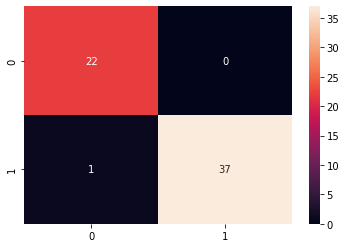

------TEST------
ACCURACY: 0.90
NEGATIVE RECALL (Y=0): 1.00
NEGATIVE PRECISION (Y=0): 0.71
POSITIVE RECALL (Y=1): 1.00
POSITIVE PRECISION (Y=1): 1.00
[[ 5  0]
 [ 2 14]]


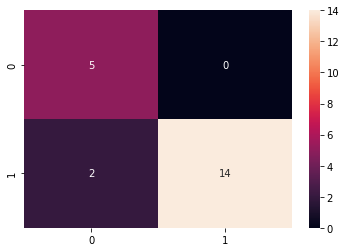

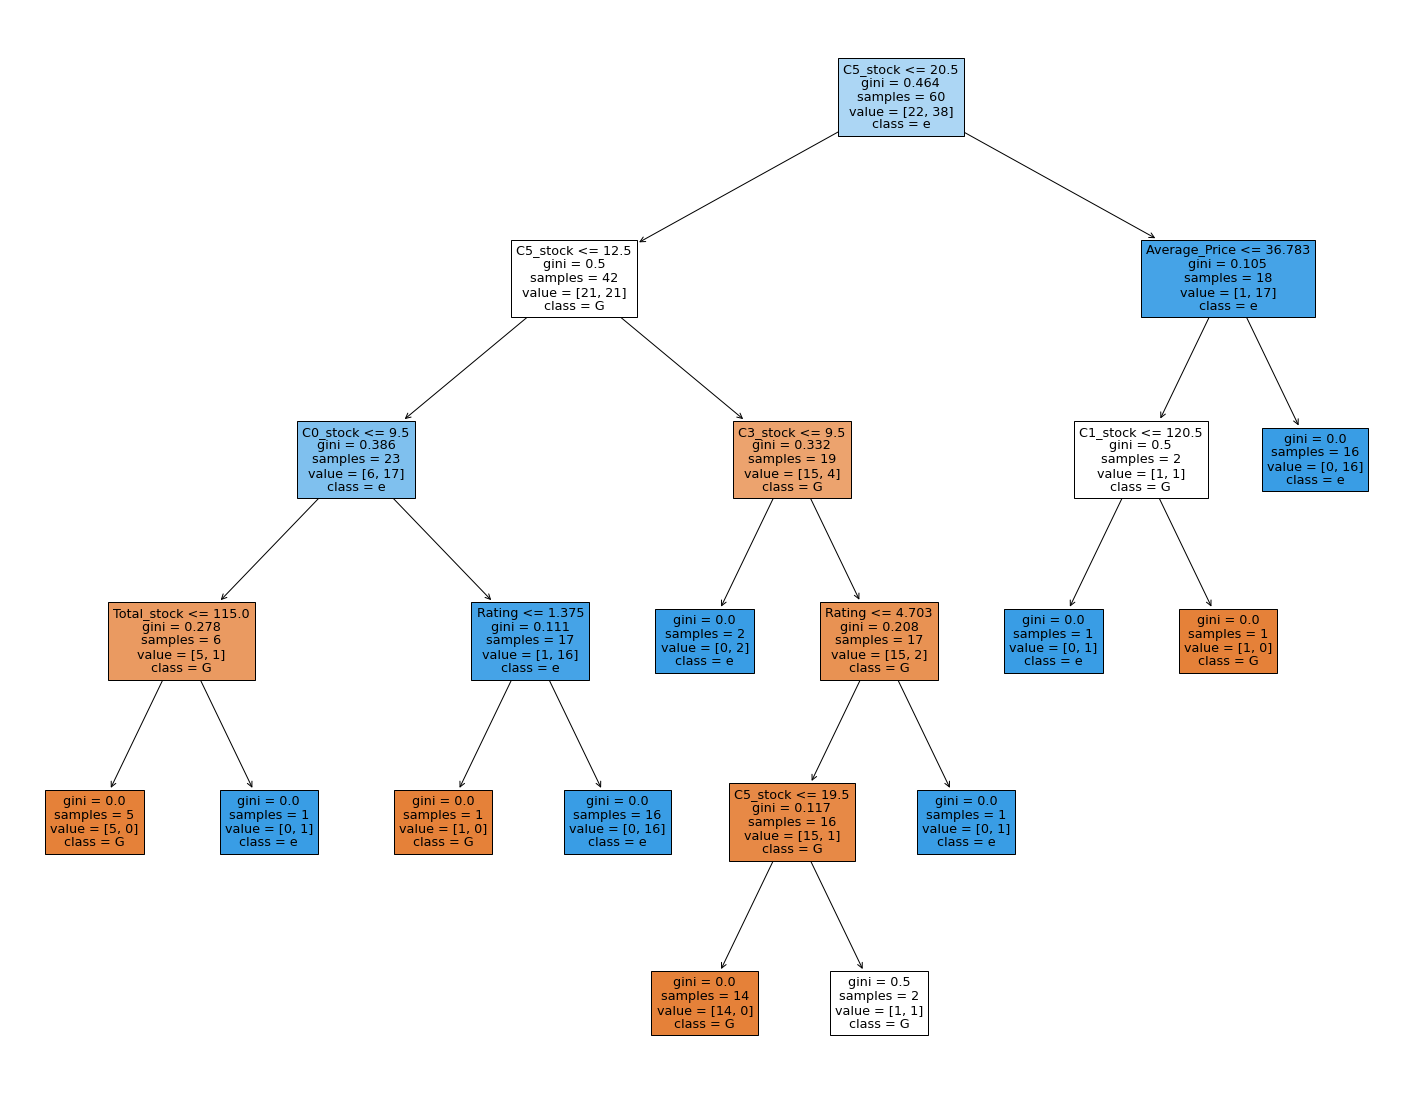

In [17]:
# RUN THE FOLLOWING CODE TO EVALUATE YOUR MODEL
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

plot_tree(model,X,Y)


# Conclusion

The accuracy has increased to around 90% by changing our max_depth to 5 for the dataset.